In [1]:
from smpl_io import io
import pandas as pd
import numpy as np
import os
import sys

sys.path.append(os.path.dirname("/home/apn/git/crosscheck/crosscheck"))

from crosscheck.data import rel_diff,ratio
from crosscheck.recola2.recola2 import compute as rc_compute
from crosscheck.madgraph.madgraph import compute as mg_compute

In [2]:
def rename(test_df):
    test_df = test_df.rename(columns={1: 'in_1', 2: 'in_2',3:'out_1',4:'out_2', 5:'out_3'})
    test_df = test_df.rename(columns={6:  'p_1_0',  7: 'p_1_1', 8:'p_1_2', 9:'p_1_3'})
    test_df = test_df.rename(columns={10: 'p_2_0', 11: 'p_2_1',12:'p_2_2',13:'p_2_3'})
    test_df = test_df.rename(columns={14: 'p_3_0', 15: 'p_3_1',16:'p_3_2',17:'p_3_3'})
    test_df = test_df.rename(columns={18: 'p_4_0', 19: 'p_4_1',20:'p_4_2',21:'p_4_3'})
    test_df = test_df.rename(columns={22: 'p_5_0', 23: 'p_5_1',24:'p_5_2',25:'p_5_3'})
    test_df = test_df.rename(columns={26: 'alphas'})
    test_df = test_df.rename(columns={27: 'alpha'})
    test_df = test_df.rename(columns={28: 'mu_r'})
    test_df = test_df.rename(columns={29: 'Born'})
    test_df = test_df.rename(columns={30: 'Virt'})
    return test_df

In [3]:
def mask(ol_df):
    #return (ol_df[1] == "-2" )&(ol_df[2] == "2" )&(ol_df[3] == "22" )&(ol_df[4] == "0" )&(ol_df[5] == "0" )
    return (ol_df[3] == "22" )


In [4]:
ol_df = pd.read_csv(io.between("START COMP DEBUG","STOP COMP DEBUG",
                       "/home/apn/git/powheg-box-v2/directphotonjj/testrun-lhc/bench-openloops/working/run-st1-xg1-1.log"
                      ),
            header=None,
            delimiter='\s+',
           )

ol_df = ol_df[(ol_df[0] != "Thanks") & (ol_df[0] != "Eur.Phys.J.")]
ol_df= ol_df.set_index(0)
ol_df = ol_df [ mask(ol_df)]
ol_df = rename(ol_df)
ol_df

,in_1,in_2,out_1,out_2,out_3,p_1_0,p_1_1,p_1_2,p_1_3,p_2_0,...,p_4_3,p_5_0,p_5_1,p_5_2,p_5_3,alphas,alpha,mu_r,Born,Virt
0,,,,,,,,,,,,,,,,,,,,,
176,1,-1,22,0,0,2170.0064065032557,0.0000000000000000,0.0000000000000000,2170.0064065032557,2170.0064065032552,...,-2155.405762,16.856347,-15.740603,5.615891,2.198091,0.118775,0.007297,87.342139,0.111350,-2.976219
177,2,-2,22,0,0,2170.0064065032557,0.0000000000000000,0.0000000000000000,2170.0064065032557,2170.0064065032552,...,-2155.405762,16.856347,-15.740603,5.615891,2.198091,0.118775,0.007297,87.342139,0.445401,-11.904842
178,3,-3,22,0,0,2170.0064065032557,0.0000000000000000,0.0000000000000000,2170.0064065032557,2170.0064065032552,...,-2155.405762,16.856347,-15.740603,5.615891,2.198091,0.118775,0.007297,87.342139,0.111350,-2.976219
179,4,-4,22,0,0,2170.0064065032557,0.0000000000000000,0.0000000000000000,2170.0064065032557,2170.0064065032552,...,-2155.405762,16.856347,-15.740603,5.615891,2.198091,0.118775,0.007297,87.342139,0.445401,-11.904842
180,5,-5,22,0,0,2170.0064065032557,0.0000000000000000,0.0000000000000000,2170.0064065032557,2170.0064065032552,...,-2155.405762,16.856347,-15.740603,5.615891,2.198091,0.118775,0.007297,87.342139,0.111350,-2.976219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9796,0,0,22,1,-1,1333.0193558790897,0.0000000000000000,0.0000000000000000,1333.0193558790897,1333.0193558790893,...,-1310.013979,763.932971,44.920923,117.526810,753.500593,0.116714,0.007297,98.103872,0.000265,0.003497
9797,0,0,22,2,-2,1333.0193558790897,0.0000000000000000,0.0000000000000000,1333.0193558790897,1333.0193558790893,...,-1310.013979,763.932971,44.920923,117.526810,753.500593,0.116714,0.007297,98.103872,0.001059,0.014024
9798,0,0,22,3,-3,1333.0193558790897,0.0000000000000000,0.0000000000000000,1333.0193558790897,1333.0193558790893,...,-1310.013979,763.932971,44.920923,117.526810,753.500593,0.116714,0.007297,98.103872,0.000265,0.003497


In [5]:
rc_df = ol_df.copy()
rc_compute(rc_df,order="NLO")
rc_df['Born'] = rc_df['Born']/rc_df['alphas']**2/rc_df['alpha']*ol_df['alphas']**2*ol_df['alpha']
rc_df['Virt'] = rc_df['Virt']/rc_df['alphas']**3/rc_df['alpha']*ol_df['alphas']**3*ol_df['alpha']/(ol_df['alphas']/2/np.pi)
rc_df

Defining processes in recola2.py:  48%|███████████████████████████████████████                                           | 1836/3850 [00:00<00:00, 9799.77it/s]


 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
                         _    _   _   _        _    _  
                        | )  |_  |   | |  |   |_|   _| 
                        | \  |_  |_  |_|  |_  | |  |_  

                REcursive Computation of One Loop Amplitudes

                                Version 2.2.4

                      by A.Denner, J.-N.Lang, S.Uccirati

 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

 From now on the output of RECOLA is written to the file output.rcl

 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx



Defining processes in recola2.py: 100%|█████████████████████████████████████████████████████████████████████████████████| 3850/3850 [00:00<00:00, 10326.98it/s]


Generating processes in recola2.py
                                                            
         *******************************************        
         *              C O L L I E R              *        
         *                                         *        
         *        Complex One-Loop Library         *        
         *      In Extended Regularizations        *        
         *                                         *        
         *    by A.Denner, S.Dittmaier, L.Hofer    *        
         *                                         *        
         *              version 1.2.7              *        
         *                                         *        
         *******************************************        
                                                            
                                                           
 ***********************************************************
                                                   

Computing processes in recola2.py: 100%|███████████████████████████████████████████████████████████████████████████████████| 3850/3850 [01:01<00:00, 62.33it/s]


,in_1,in_2,out_1,out_2,out_3,p_1_0,p_1_1,p_1_2,p_1_3,p_2_0,...,p_5_2,p_5_3,alphas,alpha,mu_r,Born,Virt,A0,A1,A2
0,,,,,,,,,,,,,,,,,,,,,
176,1,-1,22,0,0,2170.0064065032557,0.0000000000000000,0.0000000000000000,2170.0064065032557,2170.0064065032552,...,5.615891,2.198091,0.118,0.007555,87.342139,0.111350,-2.976219,0.113786,-0.057117,True
177,2,-2,22,0,0,2170.0064065032557,0.0000000000000000,0.0000000000000000,2170.0064065032557,2170.0064065032552,...,5.615891,2.198091,0.118,0.007555,87.342139,0.445401,-11.904843,0.455144,-0.228467,True
178,3,-3,22,0,0,2170.0064065032557,0.0000000000000000,0.0000000000000000,2170.0064065032557,2170.0064065032552,...,5.615891,2.198091,0.118,0.007555,87.342139,0.111350,-2.976219,0.113786,-0.057117,True
179,4,-4,22,0,0,2170.0064065032557,0.0000000000000000,0.0000000000000000,2170.0064065032557,2170.0064065032552,...,5.615891,2.198091,0.118,0.007555,87.342139,0.445401,-11.904843,0.455144,-0.228467,True
180,5,-5,22,0,0,2170.0064065032557,0.0000000000000000,0.0000000000000000,2170.0064065032557,2170.0064065032552,...,5.615891,2.198091,0.118,0.007555,87.342139,0.111350,-2.976219,0.113786,-0.057117,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9796,0,0,22,1,-1,1333.0193558790897,0.0000000000000000,0.0000000000000000,1333.0193558790897,1333.0193558790893,...,117.526810,753.500593,0.118,0.007555,98.103872,0.000265,0.003497,0.000280,0.000070,True
9797,0,0,22,2,-2,1333.0193558790897,0.0000000000000000,0.0000000000000000,1333.0193558790897,1333.0193558790893,...,117.526810,753.500593,0.118,0.007555,98.103872,0.001059,0.014024,0.001120,0.000279,True
9798,0,0,22,3,-3,1333.0193558790897,0.0000000000000000,0.0000000000000000,1333.0193558790897,1333.0193558790893,...,117.526810,753.500593,0.118,0.007555,98.103872,0.000265,0.003497,0.000280,0.000070,True


In [6]:
mg_df = ol_df.copy()
mg_compute(mg_df,n_jobs=16)
mg_df['Born'] = mg_df['Born']/mg_df['alphas']**2/mg_df['alpha']*ol_df['alphas']**2*ol_df['alpha']
mg_df['Virt'] = mg_df['Virt']/mg_df['alphas']**3/mg_df['alpha']*ol_df['alphas']**3*ol_df['alpha']/(ol_df['alphas']/2/np.pi)
mg_df

Computing processes in madgraph.py: 100%|██████████████████████████████████████████████████████████████████████████████████| 3850/3850 [06:03<00:00, 10.60it/s]


,in_1,in_2,out_1,out_2,out_3,p_1_0,p_1_1,p_1_2,p_1_3,p_2_0,...,p_5_2,p_5_3,alphas,alpha,mu_r,Born,Virt,Finite,Single Pole,Double Pole
0,,,,,,,,,,,,,,,,,,,,,
176,1,-1,22,0,0,2170.0064065032557,0.0000000000000000,0.0000000000000000,2170.0064065032557,2170.0064065032552,...,5.615891,2.198091,0.118,0.007547,87.342139,0.111350,-2.976219,-0.057053,0.009285,-0.018499
177,2,-2,22,0,0,2170.0064065032557,0.0000000000000000,0.0000000000000000,2170.0064065032557,2170.0064065032552,...,5.615891,2.198091,0.118,0.007547,87.342139,0.445401,-11.904843,-0.228211,0.037141,-0.073997
178,3,-3,22,0,0,2170.0064065032557,0.0000000000000000,0.0000000000000000,2170.0064065032557,2170.0064065032552,...,5.615891,2.198091,0.118,0.007547,87.342139,0.111350,-2.976219,-0.057053,0.009285,-0.018499
179,4,-4,22,0,0,2170.0064065032557,0.0000000000000000,0.0000000000000000,2170.0064065032557,2170.0064065032552,...,5.615891,2.198091,0.118,0.007547,87.342139,0.445401,-11.904843,-0.228211,0.037141,-0.073997
180,5,-5,22,0,0,2170.0064065032557,0.0000000000000000,0.0000000000000000,2170.0064065032557,2170.0064065032552,...,5.615891,2.198091,0.118,0.007547,87.342139,0.111350,-2.976219,-0.057053,0.009285,-0.018499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9796,0,0,22,1,-1,1333.0193558790897,0.0000000000000000,0.0000000000000000,1333.0193558790897,1333.0193558790893,...,117.526810,753.500593,0.118,0.007547,98.103872,0.000265,0.003497,0.000069,0.000043,-0.000046
9797,0,0,22,2,-2,1333.0193558790897,0.0000000000000000,0.0000000000000000,1333.0193558790897,1333.0193558790893,...,117.526810,753.500593,0.118,0.007547,98.103872,0.001059,0.014024,0.000278,0.000173,-0.000182
9798,0,0,22,3,-3,1333.0193558790897,0.0000000000000000,0.0000000000000000,1333.0193558790897,1333.0193558790893,...,117.526810,753.500593,0.118,0.007547,98.103872,0.000265,0.003497,0.000069,0.000043,-0.000046


In [7]:
fc_df= pd.read_csv(io.between("START COMP DEBUG","STOP COMP DEBUG",
                       "/home/apn/git/powheg-box-v2/directphotonjj/testrun-lhc/bench-formcalc/working/run-st1-xg1-1.log"),
            header=None,
            delimiter='\s+',
           )
fc_df = fc_df[(fc_df[0] != "Thanks") & (fc_df[0] != "Eur.Phys.J.")]  
fc_df= fc_df.set_index(0)  
fc_df = fc_df [mask(fc_df)]
fc_df = rename(fc_df)
fc_df

,in_1,in_2,out_1,out_2,out_3,p_1_0,p_1_1,p_1_2,p_1_3,p_2_0,...,p_4_3,p_5_0,p_5_1,p_5_2,p_5_3,alphas,alpha,mu_r,Born,Virt
0,,,,,,,,,,,,,,,,,,,,,
176,1,-1,22,0,0,2170.006407,0.0,0.0,2170.006407,2170.006407,...,-2155.405762,16.856347,-15.740603,5.615891,2.198091,0.118775,0.007297,87.342139,0.111350,-3.087636
177,2,-2,22,0,0,2170.006407,0.0,0.0,2170.006407,2170.006407,...,-2155.405762,16.856347,-15.740603,5.615891,2.198091,0.118775,0.007297,87.342139,0.445401,-12.350545
178,3,-3,22,0,0,2170.006407,0.0,0.0,2170.006407,2170.006407,...,-2155.405762,16.856347,-15.740603,5.615891,2.198091,0.118775,0.007297,87.342139,0.111350,-3.087636
179,4,-4,22,0,0,2170.006407,0.0,0.0,2170.006407,2170.006407,...,-2155.405762,16.856347,-15.740603,5.615891,2.198091,0.118775,0.007297,87.342139,0.445401,-12.350545
180,5,-5,22,0,0,2170.006407,0.0,0.0,2170.006407,2170.006407,...,-2155.405762,16.856347,-15.740603,5.615891,2.198091,0.118775,0.007297,87.342139,0.111350,-3.087636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9796,0,0,22,1,-1,1333.019356,0.0,0.0,1333.019356,1333.019356,...,-1310.013979,763.932971,44.920923,117.526810,753.500593,0.116714,0.007297,98.103872,0.000265,0.003242
9797,0,0,22,2,-2,1333.019356,0.0,0.0,1333.019356,1333.019356,...,-1310.013979,763.932971,44.920923,117.526810,753.500593,0.116714,0.007297,98.103872,0.001059,0.012968
9798,0,0,22,3,-3,1333.019356,0.0,0.0,1333.019356,1333.019356,...,-1310.013979,763.932971,44.920923,117.526810,753.500593,0.116714,0.007297,98.103872,0.000265,0.003242


In [8]:
def masked(ol_df):
    #return ol_df(ol_df[1] == "-2" )&(ol_df[2] == "2" )&(ol_df[3] == "22" )&(ol_df[4] == "0" )&(ol_df[5] == "0" )
    #return ol_df[(ol_df['in_1'] == "-2" ) & (ol_df['in_2'] == "2")&(ol_df['out_1'] == "22" )&(ol_df['out_2'] == "4" )&(ol_df['out_3'] == "-4" )]
    #return ol_df[(ol_df['in_1'] == "-2" ) & (ol_df['in_2'] == "2")&(ol_df['out_1'] == "22" )&(ol_df['out_2'] == "0" )&(ol_df['out_3'] == "0" )]
    return ol_df
m_fc_df = masked(fc_df)
m_ol_df = masked(ol_df)
m_mg_df = masked(mg_df)
m_rc_df = masked(rc_df)


/usr/lib/python3.11/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


[0
176     1.171540e-14
177     1.246319e-14
178     1.171540e-14
179     1.246319e-14
180     1.171540e-14
            ...     
9796    1.833536e-12
9797    1.833536e-12
9798    1.833536e-12
9799    1.833536e-12
9800    1.833536e-12
Name: Born, Length: 3850, dtype: float64, 0
176     6.443471e-14
177     6.493324e-14
178     6.443471e-14
179     6.493324e-14
180     6.443471e-14
            ...     
9796    3.198191e-12
9797    3.198191e-12
9798    3.198191e-12
9799    3.198191e-12
9800    3.198191e-12
Name: Born, Length: 3850, dtype: float64, 0
176     9.493215e-13
177     9.488230e-13
178     9.493215e-13
179     9.488230e-13
180     9.493215e-13
            ...     
9796    2.420407e-12
9797    2.420407e-12
9798    2.420407e-12
9799    2.420407e-12
9800    2.420407e-12
Name: Born, Length: 3850, dtype: float64]
[0
176     5.271931e-14
177     5.247005e-14
178     5.271931e-14
179     5.247005e-14
180     5.271931e-14
            ...     
9796    5.031727e-12
9797    5.031727e-12
979

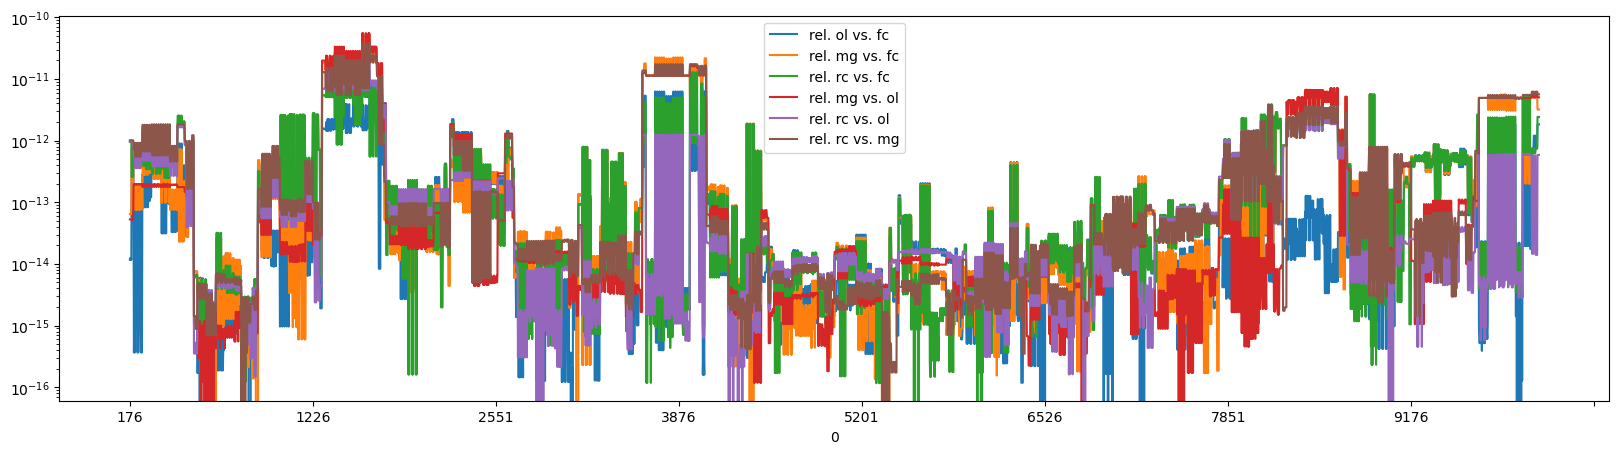

In [9]:
print(rel_diff(m_fc_df, m_ol_df,m_mg_df, m_rc_df,column="Born",labels=["fc", "ol","mg","rc"]))
print(rel_diff(m_ol_df,m_mg_df, m_rc_df,column="Born",labels=[ "ol","mg","rc"]))
print(rel_diff(m_mg_df, m_rc_df,column="Born",labels=[ "mg","rc"]))

[0
176     0.036085
177     0.036088
178     0.036085
179     0.036088
180     0.036085
          ...   
9796    0.078677
9797    0.081454
9798    0.078677
9799    0.081454
9800    0.078677
Name: Virt, Length: 3850, dtype: float64, 0
176     0.036085
177     0.036088
178     0.036085
179     0.036088
180     0.036085
          ...   
9796    0.078678
9797    0.081453
9798    0.078678
9799    0.081453
9800    0.078678
Name: Virt, Length: 3850, dtype: float64, 0
176     0.036085
177     0.036088
178     0.036085
179     0.036088
180     0.036085
          ...   
9796    0.078679
9797    0.081453
9798    0.078679
9799    0.081453
9800    0.078679
Name: Virt, Length: 3850, dtype: float64]
[0
176     4.938160e-08
177     3.759981e-08
178     4.938160e-08
179     3.759981e-08
180     4.938160e-08
            ...     
9796    1.476402e-06
9797    6.975789e-07
9798    1.476402e-06
9799    6.975789e-07
9800    1.476402e-06
Name: Virt, Length: 3850, dtype: float64, 0
176     6.925486e-08
177    

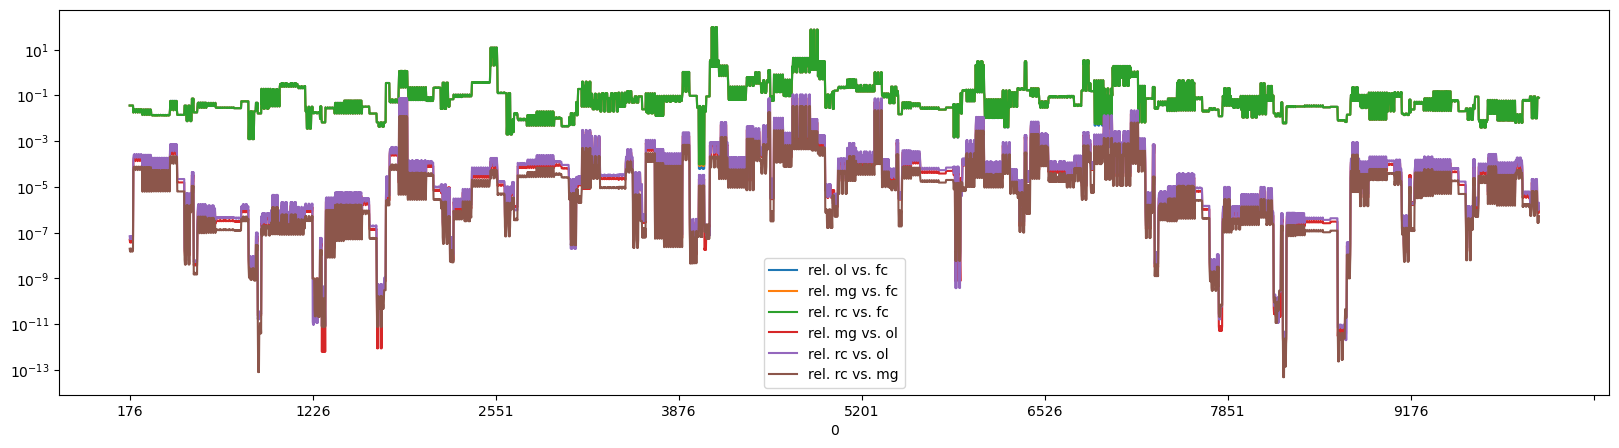

In [10]:
print(rel_diff(m_fc_df, m_ol_df,m_mg_df, m_rc_df,column="Virt",labels=["fc", "ol","mg","rc"]))
print(rel_diff(m_ol_df,m_mg_df, m_rc_df,column="Virt",labels=[ "ol","mg","rc"]))
print(rel_diff(m_mg_df, m_rc_df,column="Virt",labels=[ "mg","rc"]))

[0
176     0.963915
177     0.963912
178     0.963915
179     0.963912
180     0.963915
          ...   
9796    1.078677
9797    1.081454
9798    1.078677
9799    1.081454
9800    1.078677
Name: Virt, Length: 3850, dtype: float64, 0
176     0.963915
177     0.963912
178     0.963915
179     0.963912
180     0.963915
          ...   
9796    1.078678
9797    1.081453
9798    1.078678
9799    1.081453
9800    1.078678
Name: Virt, Length: 3850, dtype: float64, 0
176     0.963915
177     0.963912
178     0.963915
179     0.963912
180     0.963915
          ...   
9796    1.078679
9797    1.081453
9798    1.078679
9799    1.081453
9800    1.078679
Name: Virt, Length: 3850, dtype: float64]
[0
176     1.000000
177     1.000000
178     1.000000
179     1.000000
180     1.000000
          ...   
9796    1.000001
9797    0.999999
9798    1.000001
9799    0.999999
9800    1.000001
Name: Virt, Length: 3850, dtype: float64, 0
176     1.000000
177     1.000000
178     1.000000
179     1.000000
180 

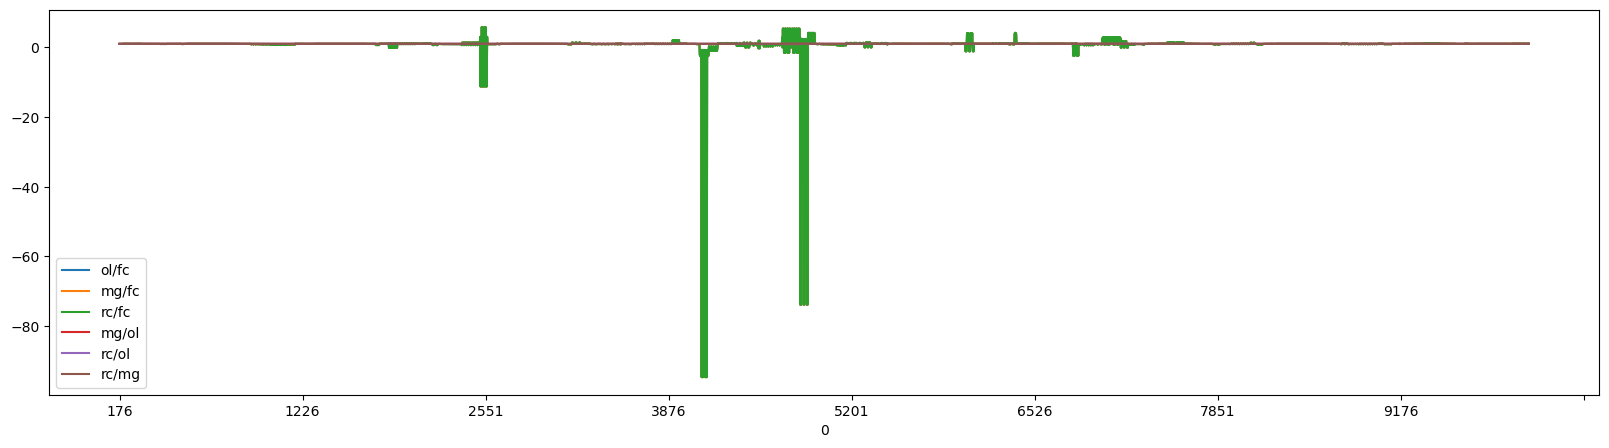

In [11]:
print(ratio(m_fc_df, m_ol_df,m_mg_df, m_rc_df,column="Virt",labels=["fc", "ol","mg","rc"],logy=False))
print(ratio(m_ol_df,m_mg_df, m_rc_df,column="Virt",labels=[ "ol","mg","rc"],logy=False))
print(ratio(m_mg_df, m_rc_df,column="Virt",labels=[ "mg","rc"],logy=False))